<a href="https://colab.research.google.com/github/daniel-lorenzo/Termodinamica/blob/master/Pr%C3%A1ctica_8/P8_Ejercicio_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 4
Para el siguiente sistema y despreciando la variación de energía cinética y potencial. Determinar:

a) $\Delta S_u$     
b) $\eta_{ex,proceso}$

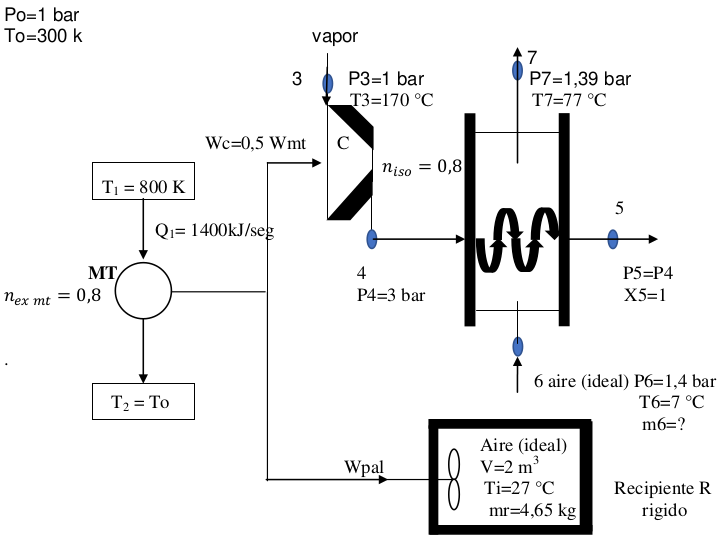

## Solución

In [ ]:
# Datos:
T_1 = 800 # [K]
T_2 = T_0 = 300 # [K]
Q_1 = 1400 # [kJ/s]
η_exmt = 0.8
P_3 = 100 # [kPa]
T_3 = 170 + 273 # [K]
η_iso = 0.8
P_5 = P_4 = 300 # [kPa]
x_5 = 1
P_6 = 140 # [kPa]
T_6 = 7 + 273 # [K]
P_7 = 139 # [kPa]
T_7 = 77 + 273 # [K]
V = 2 # [m^3]
T_i = 27 + 273 # [K]
m_r = 4.65 # [kg]
cp_aire = 1.0047 # [kJ/(kg·K)]
cv_aire = 0.7176 # [kJ/(kg·K)]
R_aire = 0.2870 # [kJ/(kg·K)]

---
### Máquina térmica

Variación de entropía de la fuente 1
$$\Delta S_1 = \frac{Q_1}{T_1}$$

Calor útil 1
$$Q_{u1} = Q_1 - T_0 \Delta S_1$$

Calor útil 2
$$Q_{u2} = 0$$

Rendimiento exergético de la máquina térmica

$$\eta_{ex,mt} = \frac{W_{mt}}{Q_{u1}}$$

Trabajo de la máquina térmica
$$W_{mt} = \eta_{ex,mt} Q_{u1} $$

$$W_{mt} = Q_1 + Q_2$$

Calor 2
$$Q_2 = W_{mt} - Q_1$$

Variación de entropía de la fuente 2
$$\Delta S_2 = \frac{Q_2}{T_2}$$

In [ ]:
# Variación de entropía de la fuente 1
ΔS_1 = (-Q_1)/T_1
# Calor útil 1
Q_u1 = (-Q_1) - T_0*ΔS_1
# Calor útil 2
Q_u2 = 0
# Trabajo de la máquina térmica
W_mt = η_exmt*Q_u1
# Calor 2
Q_2 = abs(W_mt) - Q_1
# Variación de entropía de la fuente 2
ΔS_2 = abs(Q_2)/T_2

In [ ]:
#@title Resultados
print("ΔS_1 = %.2f [kJ/K]"%ΔS_1)
print("Q_u1 = %.1f [kJ/s]"%Q_u1)
print("W_mt = %.1f [kJ/s]"%W_mt)
print("ΔS_2 = %.3f [kJ/K]"%ΔS_2)
print("Q_2 = %.1f [kJ/s]"%Q_2)

ΔS_1 = -1.75 [kJ/K]
Q_u1 = -875.0 [kJ/s]
W_mt = -700.0 [kJ/s]
ΔS_2 = 2.333 [kJ/K]
Q_2 = -700.0 [kJ/s]


---
### Compresor

Trabajo en el compresor
$$W_c = 0,5 W_{mt}$$

De tabla:
$P_3, \; T_3 \qquad \rightarrow \qquad h_3, \; s_3$

$$s_{4ideal} = s_3$$

De tabla: $P_4, \; s_{4ideal} \qquad \rightarrow \qquad h_{4ideal}$

Rendimiento isoentrópico
$$\eta_{iso} = \frac{h_{4ideal} - h_3}{h_4 - h_3}$$

Despejamos $h_4$
$$h_4 = h_3 + \frac{h_{4ideal} - h_3}{\eta_{iso}}$$

Trabajo en el compresor
$$-W_c = m_3 (h_4 - h_3)$$

Despejamos $m_3$
$$m_3 = \frac{-W_c}{h_4 - h_3}$$

Tenemos que
$$m_5 = m_4 = m_3$$

In [ ]:
!pip install CoolProp

In [ ]:
import CoolProp.CoolProp as cp

In [ ]:
# Trabajo en el compresor
W_c = 0.5*W_mt
# Entalpía en 3, con P_3 y T_3
h_3 = cp.PropsSI('H','P',P_3*1e3,'T',T_3,'Water')/1e3 # [kJ/kg]
# Entropía en 3, con P_3 y T_3
s_3 = cp.PropsSI('S','P',P_3*1e3,'T',T_3,'Water')/1e3 # [kJ/(kg·K)]
# Entropía ideal o reversible en 4
s_4ideal = s_3

In [ ]:
# Consulta de estado en 4 con P_4 y s_4ideal
cp.PhaseSI('P',P_4*1e3,'S',s_4ideal*1e3,'Water')

'gas'

In [ ]:
# Entalpía ideal o reversible en 4, con P_4 y s_4ideal
h_4ideal = cp.PropsSI('H','P',P_4*1e3,'S',s_4ideal*1e3,'Water')/1e3
# Entalpía en 4
h_4 = h_3 + (h_4ideal - h_3)/η_iso
# Flujo másico en 3
m_3 = W_c/(h_3 - h_4)
# Flujo másico en 4 y 5
m_5 = m_4 = m_3

In [ ]:
#@title Resultados
print("W_c = %.1f [kJ/s]"%W_c)
print("h_3 = %.2f [kJ/kg]"%h_3)
print("s_3 = %.4f [kJ/(kg·K)]"%s_3)
print("s_4ideal = %.4f [kJ/(kg·K)]"%s_4ideal)
print("h_4ideal = %.2f [kJ/kg]"%h_4ideal)
print("h_4 = %.2f [kJ/kg]"%h_4)
print("\nm_3 = m_4 = m_5 = %.2f [kg/s]"%m_3)

W_c = -350.0 [kJ/s]
h_3 = 2815.90 [kJ/kg]
s_3 = 7.7055 [kJ/(kg·K)]
s_4ideal = 7.7055 [kJ/(kg·K)]
h_4ideal = 3070.62 [kJ/kg]
h_4 = 3134.30 [kJ/kg]

m_3 = m_4 = m_5 = 1.10 [kg/s]


---
### Intercambiador de calor

$P_5 = 1 \; \mathrm{bar}$   
$ x_5 = 1 \qquad \rightarrow \qquad h_5, \; s_5$

Primer principio termodinámica (sistema abierto)

$$Q - W = \Delta H$$

$Q = 0$   
$W = 0$

Reemplazamos
$$\Delta H = m_6 c_p (T_7 - T_6) + m_3 (h_5 - h_4) = 0$$

Despejamos $m_6$
$$m_6 = \frac{m_3 (h_4 - h_5)}{c_p (T_7 - T_6)}$$

In [ ]:
h_5 = cp.PropsSI('H','P',P_5*1e3,'Q',x_5,'Water')/1e3
s_5 = cp.PropsSI('S','P',P_5*1e3,'Q',x_5,'Water')/1e3
m_6 = m_3*(h_4 - h_5)/(cp_aire*(T_7 - T_6))

In [ ]:
#@title Resultado
print("m_6 = %.2f [kg/s]"%m_6)

m_6 = 6.40 [kg/s]


---
### Recipiente

Primer principio termodinámica
$$Q = \Delta U + W$$

Reemplazamos
$$0 = m c_v (T_f - T_i) + W_{pal}$$

Despejamos $T_f$
$$T_f = T_i - \frac{W_{pal}}{m c_v}$$

Variación de entropía del recipiente
$$\Delta S_{ar} = m \left( c_v \ln  \frac{T_f}{T_i} + R_{ar} \ln \frac{V_f}{V_i} \right)$$

Variación de exergía en el recipiente
$$\Delta Ex_{ar} = W_{pal} - T_0 \Delta S_{ar}$$

In [ ]:
import numpy as np

In [ ]:
W_pal = 0.5*W_mt
T_f = T_i - W_pal/(m_r*cv_aire)
ΔS_ar = m_r*(cv_aire*np.log(T_f/T_i))
ΔEx_ar = - W_pal - T_0*ΔS_ar

In [ ]:
#@title Resultados
print("ΔEx_ar = %.1f [kJ]"%ΔEx_ar)
print("T_f = %.2f [K]"%T_f)
print("ΔS_ar = %.3f [kJ/kg]"%ΔS_ar)
print("ΔEx_ar = %.1f [kJ]"%ΔEx_ar)

ΔEx_ar = 49.9 [kJ]
T_f = 404.89 [K]
ΔS_ar = 1.000 [kJ/kg]
ΔEx_ar = 49.9 [kJ]


---
### Intercambiador de calor

Variación de entropía 3-5
$$\Delta S_{35} = m_3 (s_5 - s_3)$$

Variación de entropía 6-7

$$\Delta S_{67} = m_6 \left( c_p \ln \frac{T_7}{T_6} + R \ln \frac{P_7}{P_6} \right)$$

Variación de entropía del universo

$$\Delta S_u = \Delta S_1 + \Delta S_2 + \Delta S_{ar} + \Delta S_{35} + \Delta S_{67}$$

In [ ]:
ΔS_35 = m_3*(s_5 - s_3)
ΔS_67 = m_6*(cp_aire*np.log(T_7/T_6) + R_aire*np.log(P_7/P_6))
ΔS_u = ΔS_1 + ΔS_2 + ΔS_ar + ΔS_35 + ΔS_67

Variación de exergía 3-5
$$\Delta Ex_{35} = \Delta H_{35} - T_0 \Delta S_{35}$$

$$\Delta Ex_{35} = m_3 (h_5 - h_3) - T_0 \Delta S_{35}$$

Variación de exergía 6-7
$$\Delta Ex_{67} = m_6 c_p (T_7 - T_6) - T_0 \Delta S_{67}$$

Rendimiento exergético
$$\eta_{ex} = \frac{\Delta Ex_{ar} + \Delta Ex_{35} + \Delta Ex_{67}}{Q_{u1}}$$

In [ ]:
ΔEx_35 = m_3*(h_5 - h_3) - T_0*ΔS_35
ΔEx_67 = m_6*cp_aire*(T_7 - T_6) - T_0*ΔS_67

η_ex = (ΔEx_ar + ΔEx_35 + ΔEx_67)/abs(Q_u1)

In [ ]:
#@title Resultados
print("ΔS_35 = %.4f [kJ/K]"%ΔS_35)
print("ΔS_67 = %.4f [kJ/K]"%ΔS_67)
print("ΔS_u = %.4f [kJ/K]"%ΔS_u)
print("ΔEx_35 = %.3f [kJ/s]"%ΔEx_35)
print("ΔEx_67 = %.3f [kJ/s]"%ΔEx_67)
print("\nη_ex = %.3f"%η_ex)

ΔS_35 = -0.7848 [kJ/K]
ΔS_67 = 1.4215 [kJ/K]
ΔS_u = 2.2206 [kJ/K]
ΔEx_35 = 135.374 [kJ/s]
ΔEx_67 = 23.604 [kJ/s]

η_ex = 0.239
